# Group work - Assessment 2

In this assignment, we will focus on salary prediction. The data set for this assignment includes information on job descriptions and salaries. Use this data set to see if you can predict the salary of a job posting (i.e., the `Salary` column in the data set) based on the job description. This is important, because this model can make a salary recommendation as soon as a job description is entered into a system.

## Description of Variables

The description of variables are provided in "Jobs - Data Dictionary.docx"

## Goal

Use the **jobs_alldata.csv** data set and build models to predict **salary**.

**Be careful: this is a REGRESSION task**

## Submission:

Please save and submit this Jupyter notebook file. The correctness of the code matters for your grade. **Readability and organization of your code is also important.** You may lose points for submitting unreadable/undecipherable code. Therefore, use markdown cells to create sections, and use comments where necessary.


## Recommended roles for group members:

**Section 1:** to be completed by both group members

**Section 2:** first three models to be completed by the first group member and checked by the second; last two models to be completed by the second group members and checked by the first group member.

**Discussion:** to be completed by both group members

**Important notes:**
- Both group members will get the same grade. Therefore, you should check the work of your group member. If they make a mistake, you will be responsible for that mistake too.
- Both group members must put in their fair share of effort. Otherwise, those who don't contribute to the assignment will not receive any grade.


# Section 1: (8 points in total)

## Data Prep (6 points)

In [ ]:
#1 - import data

In [2]:
import numpy as np
import pandas as pd

np.random.seed(12345612)

jobs = pd.read_csv('jobs_alldata.csv')
jobs.head()

,Salary,Job Description,Location,Min_years_exp,Technical,Comm,Travel
0,67206,Civil Service Title: Regional Director Mental ...,Remote,5,2,3,0
1,88313,The New York City Comptrollerâ€™s Office Burea...,Remote,5,2,4,10-15
2,81315,With minimal supervision from the Deputy Commi...,East campus,5,3,3,5-10
3,76426,OPEN TO CURRENT BUSINESS PROMOTION COORDINATOR...,East campus,1,1,3,0
4,55675,Only candidates who are permanent in the Princ...,Southeast campus,1,1,3,5-10


In [ ]:
#2- Split

In [3]:


from sklearn.model_selection import train_test_split

#SPLITTING AS 75 AND 25
train_set, test_set = train_test_split(jobs, test_size=0.25)


#checking nulls
train_set.isna().sum()



Salary             0
Job Description    0
Location           0
Min_years_exp      0
Technical          0
Comm               0
Travel             0
dtype: int64

In [4]:
test_set.isna().sum()

Salary             0
Job Description    0
Location           0
Min_years_exp      0
Technical          0
Comm               0
Travel             0
dtype: int64

In [5]:
train = train_set
test = test_set

In [7]:
#dropping target variable and job des column and storing them separately

train_y = train[['Salary']]
test_y = test[['Salary']]

train_job = train['Job Description']
test_job = test['Job Description']

train_inputs = train.drop(['Salary','Job Description'], axis=1)
test_inputs = test.drop(['Salary', 'Job Description'], axis=1)

In [8]:
#3- Transforming

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

In [10]:
train_inputs.dtypes

Location         object
Min_years_exp     int64
Technical         int64
Comm              int64
Travel           object
dtype: object

In [11]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

#not dealing with binary as its not present

In [12]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())])

In [13]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [15]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)],
        remainder='passthrough')


In [16]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_inputs)

train_x

array([[-1.13637886,  2.26507001, -1.26976143, ...,  0.        ,
         0.        ,  0.        ],
       [-0.02518461, -0.20380626, -0.14433349, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.53041251, -1.02676501,  2.10652239, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.53041251,  2.26507001, -2.39518937, ...,  1.        ,
         0.        ,  0.        ],
       [-1.13637886, -1.02676501,  0.98109445, ...,  0.        ,
         0.        ,  0.        ],
       [-0.58078173,  0.6191525 , -0.14433349, ...,  0.        ,
         0.        ,  0.        ]])

In [17]:
# Transform the test data
test_x = preprocessor.transform(test_inputs)

test_x

array([[-1.13637886,  0.6191525 ,  0.98109445, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53041251,  1.44211125, -0.14433349, ...,  0.        ,
         0.        ,  1.        ],
       [-1.13637886, -1.02676501, -0.14433349, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.08600963, -1.02676501,  0.98109445, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53041251, -0.20380626,  0.98109445, ...,  0.        ,
         0.        ,  0.        ],
       [-0.58078173,  0.6191525 , -1.26976143, ...,  0.        ,
         0.        ,  0.        ]])

In [18]:
train_x.shape

(1809, 12)

In [19]:
test_x.shape

(604, 12)

In [ ]:
#4- Job description coloumn - Doc matrix - SVD

In [20]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/shiva/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/shiva/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /Users/shiva/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
train_job.head()

1775    The NYC Law Department is hiring 2 Staff Analy...
1183    The NYC Department of Consumer Affairs (DCA) p...
2280    About New York City Cyber Command  NYC Cyber C...
406     The NYC Department of Environmental Protection...
29      The New York City Department of Investigation ...
Name: Job Description, dtype: object

In [22]:
#Create a blank list

new_train = []


# For each row in train_set, we will read the text, tokenize it, remove stopwords, lemmatize it, 
# and save it to the new list

for text in train_job:
    text = re.sub(r'[!"#$%&()*+,-./:;<=>?[\]^_`{|}~]', ' ', text).lower()
        
    words= nltk.tokenize.word_tokenize(text)
    words = [w for w in words if w.isalpha()]
    words = [w for w in words if len(w)>2 and w not in stopwords.words('english')]
        
    lemmatizer = nltk.stem.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    new_train.append(' '.join(words))

In [25]:
# Let's convert the original train_set to a dataframe

train_set_df = pd.DataFrame(train_set)

train_set_df['new_text'] = new_train

train_set_df

,Salary,Job Description,Location,Min_years_exp,Technical,Comm,Travel,new_text
1775,62143,The NYC Law Department is hiring 2 Staff Analy...,Remote,1,5,2,0,nyc law department hiring staff analyst level ...
1183,66771,The NYC Department of Consumer Affairs (DCA) p...,HQ,3,2,3,5-10,nyc department consumer affair dca protects en...
2280,95675,About New York City Cyber Command NYC Cyber C...,Remote,4,1,5,0,new york city cyber command nyc cyber command ...
406,67741,The NYC Department of Environmental Protection...,West campus,5,3,4,0,nyc department environmental protection dep en...
29,49919,The New York City Department of Investigation ...,Southeast campus,1,2,3,0,new york city department investigation doi one...
...,...,...,...,...,...,...,...,...
508,77247,"Under general supervision, the successful cand...",HQ,1,3,3,0,general supervision successful candidate perfo...
670,100548,Only candidates who are permanent in the Assoc...,HQ,5,1,3,5-10,candidate permanent associate project manager ...
2043,3624,Please read this posting carefully to make cer...,West campus,4,5,1,1-5,please read posting carefully make certain mee...
367,119667,The Department of Design and Construction seek...,West campus,1,1,4,0,department design construction seek hire secti...


In [26]:

new_test = []

for text in test_job:
    text = re.sub(r'[!"#$%&()*+,-./:;<=>?[\]^_`{|}~]', ' ', text).lower()
        
    words= nltk.tokenize.word_tokenize(text)
    words = [w for w in words if w.isalpha()]
    words = [w for w in words if len(w)>2 and w not in stopwords.words('english')]
        
    lemmatizer = nltk.stem.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    new_test.append(' '.join(words))


In [27]:
# Let's convert the original test_set to a dataframe

test_set_df = pd.DataFrame(test_set)

test_set_df['new_text'] = new_test

test_set_df

,Salary,Job Description,Location,Min_years_exp,Technical,Comm,Travel,new_text
492,90933,The New York City Department of Investigation ...,HQ,1,3,4,0,new york city department investigation one old...
2321,81436,The Commission on Human Rights (the Commission...,HQ,4,4,3,5-10,commission human right commission agency charg...
383,53242,"Under direct supervision, assist in the routin...",Remote,1,1,3,0,direct supervision assist routine maintenance ...
725,42695,The NYC Department of Environmental Protection...,East campus,5,2,4,10-15,nyc department environmental protection dep en...
1748,58917,The New York City Department of Investigation ...,HQ,4,2,4,10-15,new york city department investigation conduct...
...,...,...,...,...,...,...,...,...
875,50521,ACS Payment Services is responsible for ensuri...,Remote,1,2,4,0,ac payment service responsible ensuring agency...
1999,109124,The New York City Employeesâ€™ Retirement Syst...,HQ,2,1,4,0,new york city retirement system seek deputy di...
1171,81091,Only candidates who are permanent in the Civil...,Southeast campus,5,1,4,0,candidate permanent civil engineer title reach...
879,50904,The New York City Department of Investigation ...,HQ,4,2,4,0,new york city department investigation one old...


In [28]:
#term-by-doc matrix

In [59]:
#TfidfVectorizer includes pre-processing, tokenization, filtering stop words
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english')

train_x_tr = tfidf_vect.fit_transform(train_set_df['new_text'])

In [60]:
test_x_tr = tfidf_vect.transform(test_set_df['new_text'])

In [61]:
train_x_tr.shape, test_x_tr.shape

((1809, 7602), (604, 7602))

In [62]:
#Latent Semantic Analysis (Singular Value Decomposition)

In [63]:
from sklearn.decomposition import TruncatedSVD

In [84]:
svd = TruncatedSVD(n_components=700, n_iter=10)

In [85]:
train_x_lsa = svd.fit_transform(train_x_tr)

In [86]:
train_x_lsa.shape

(1809, 700)

In [87]:
train_x_lsa

array([[ 0.1694875 , -0.11185233, -0.0240719 , ..., -0.00462463,
         0.0025352 , -0.005655  ],
       [ 0.16980555, -0.13157178, -0.13851299, ..., -0.00418107,
         0.00475848,  0.00282868],
       [ 0.14980914, -0.11556057, -0.05830168, ...,  0.009575  ,
        -0.00517577,  0.01294156],
       ...,
       [ 0.11237314, -0.00338873, -0.02151415, ...,  0.01827397,
         0.01190812, -0.00625348],
       [ 0.30333368, -0.06647345,  0.04985513, ..., -0.00111565,
        -0.01605335, -0.00412954],
       [ 0.25913119, -0.17965334, -0.05991791, ...,  0.10369271,
        -0.02583999, -0.02240964]])

In [88]:
#checking variance for different values of components and fixing it as 700

svd.explained_variance_.sum()

0.8671420513093504

In [90]:
test_x_lsa = svd.transform(test_x_tr)

In [91]:
test_x_lsa.shape

(604, 700)

In [89]:
#5 - side by side merging all the parts of data

In [92]:
train_m = np.column_stack((train_x, train_x_lsa))
test_m = np.column_stack((test_x, test_x_lsa))

In [93]:
train_m.shape

(1809, 712)

In [94]:
test_m.shape

(604, 712)

## Feature Engineering (1 points)

Create one NEW feature from existing data. You either transform a single variable, or create a new variable from existing ones. 

Grading: 
- 0.5 points for creating the new feature correctly
- 0.5 points for the justification of the new feature (i.e., why did you create this new feature)

In [95]:
#creating a binary column for Location

def new_col(df):
    df1 = df.copy()
    df1['Location_type']=np.where(df1['Location'] == 'Remote', 1, 0)
    return df1['Location_type']

In [101]:
new_col(train_set)
train_n_l = new_col(train_set)
train_n_l

1775    1
1183    0
2280    1
406     0
29      0
       ..
508     0
670     0
2043    0
367     0
1811    0
Name: Location_type, Length: 1809, dtype: int64

In [102]:
new_col(test_set)
test_n_l = new_col(test_set)
test_n_l

492     0
2321    0
383     1
725     0
1748    0
       ..
875     1
1999    0
1171    0
879     0
1676    0
Name: Location_type, Length: 604, dtype: int64

In [ ]:
#side by side merging with the prepared test and train data set

In [103]:
train_f = np.column_stack((train_m, train_n_l))
test_f = np.column_stack((test_m, test_n_l))

In [104]:
train_f.shape

(1809, 713)

In [105]:
test_f.shape

(604, 713)

In [ ]:
# Justification of the new feature
# This can enable us in to discriminate the type of job based on location
# There can be chance that remote jobs might be paid more or less salary

## Find the Baseline (1 point)

In [106]:
from sklearn.metrics import mean_squared_error

In [107]:
#First find the average value of the target

mean_value = np.mean(train_y['Salary'])

mean_value

78414.17302377004

In [108]:
# Predicting all values as the mean

baseline_pred = np.repeat(mean_value, len(test_y))

In [109]:
baseline_mse = mean_squared_error(test_y, baseline_pred)

baseline_rmse = np.sqrt(baseline_mse)

print('Baseline RMSE: {}' .format(baseline_rmse))

Baseline RMSE: 28253.09502250984


In [ ]:
#Baseline RMSE is 28253.095

# Section 2: (7 points in total)

Build the following models:


## Decision Tree: (1 point)

In [110]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(min_samples_leaf = 10) 

tree_reg.fit(train_f, train_y)

DecisionTreeRegressor(min_samples_leaf=10)

In [111]:
#Train data RMSE
train_pred = tree_reg.predict(train_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 14134.977359087583


In [112]:
#Test data RMSE
test_pred = tree_reg.predict(test_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 20465.437779924472


In [ ]:
#Enhancing the regularization

In [113]:
tree_reg2 = DecisionTreeRegressor(min_samples_leaf = 5, max_depth=10) 

tree_reg2.fit(train_f, train_y)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)

In [115]:
#Train RMSE
train_pred = tree_reg2.predict(train_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 12761.774683426407


In [116]:
#Test RMSE
test_pred = tree_reg2.predict(test_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 20475.49745677977


In [117]:
train_error = []
test_error = []

for x in range(1,31):
    tree_reg3 = DecisionTreeRegressor(max_depth=x)
    tree_reg3.fit(train_f, train_y)
    reg_train_predictions = tree_reg3.predict(train_f)
    reg_test_predictions = tree_reg3.predict(test_f)
    train_rmse = round(np.sqrt(mean_squared_error (train_y, reg_train_predictions)),4)
    test_rmse = round(np.sqrt(mean_squared_error (test_y, reg_test_predictions)),4)
    print('# Max depth = {}'.format(x) + "     " +'Train RMSE = {}'.format(train_rmse) + "   "
         'Test RMSE = {}'.format(test_rmse))
    
    train_error.append(train_rmse)
    test_error.append(test_rmse)

# Max depth = 1     Train RMSE = 28541.5651   Test RMSE = 26572.4873
# Max depth = 2     Train RMSE = 27467.8287   Test RMSE = 26219.3502
# Max depth = 3     Train RMSE = 25670.0078   Test RMSE = 25556.8556
# Max depth = 4     Train RMSE = 23914.6937   Test RMSE = 25201.5309
# Max depth = 5     Train RMSE = 21852.3313   Test RMSE = 24475.5801
# Max depth = 6     Train RMSE = 20187.6396   Test RMSE = 23638.151
# Max depth = 7     Train RMSE = 18465.2485   Test RMSE = 22775.9082
# Max depth = 8     Train RMSE = 16695.8858   Test RMSE = 21989.85
# Max depth = 9     Train RMSE = 14900.2147   Test RMSE = 21373.398
# Max depth = 10     Train RMSE = 13036.3294   Test RMSE = 20921.7601
# Max depth = 11     Train RMSE = 11252.3439   Test RMSE = 20000.8135
# Max depth = 12     Train RMSE = 9560.9074   Test RMSE = 19976.8379
# Max depth = 13     Train RMSE = 7915.7094   Test RMSE = 19315.1998
# Max depth = 14     Train RMSE = 6184.5059   Test RMSE = 19273.0003
# Max depth = 15     Train RMSE = 46

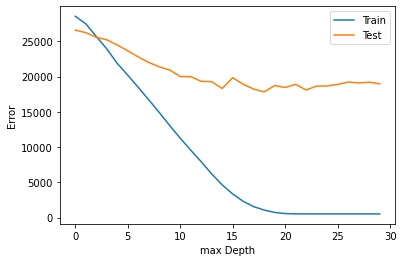

In [118]:
from matplotlib import pyplot as plt

plt.plot(train_error, label='Train')
plt.plot(test_error, label='Test')
plt.xlabel("max Depth")
plt.ylabel("Error")
plt.legend()

In [ ]:
#looking at graph max depth =10 would be better
# Max depth = 10     Train RMSE = 13036.3294   Test RMSE = 20921.7601

## Voting regressor (2 points):

The voting regressor should have at least 3 individual models

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.svm import SVR 
from sklearn.ensemble import VotingRegressor


dtree_reg = DecisionTreeRegressor(max_depth=20)
svm_reg = SVR(kernel="rbf", C=10, epsilon=0.01, gamma='scale') 
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3)

voting_reg = VotingRegressor(
            estimators=[('dt', dtree_reg), ('svr', svm_reg), ('sgd', sgd_reg)],
                        weights=[0.6, 0.2, 0.2])

voting_reg.fit(train_f, train_y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingRegressor(estimators=[('dt', DecisionTreeRegressor(max_depth=20)),
                            ('svr', SVR(C=10, epsilon=0.01)),
                            ('sgd', SGDRegressor(max_iter=10000))],
                weights=[0.6, 0.2, 0.2])

In [120]:
#Train RMSE
train_pred = voting_reg.predict(train_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 8180.225227782884


In [121]:
#Test RMSE
test_pred = voting_reg.predict(test_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 16689.91556992796


In [148]:
dtree_reg = DecisionTreeRegressor(max_depth=20)
svm_reg = SVR(kernel="rbf", C=10, epsilon=0.01, gamma='scale') 
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3)

voting_reg = VotingRegressor(
            estimators=[('dt', dtree_reg), ('svr', svm_reg), ('sgd', sgd_reg)],
                        weights=[0.5, 0.25, 0.25])

voting_reg.fit(train_f, train_y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingRegressor(estimators=[('dt', DecisionTreeRegressor(max_depth=20)),
                            ('svr', SVR(C=10, epsilon=0.01)),
                            ('sgd', SGDRegressor(max_iter=10000))],
                weights=[0.5, 0.25, 0.25])

In [149]:
#Train RMSE
train_pred = voting_reg.predict(train_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 10079.58290534753


In [150]:
#Test RMSE
test_pred = voting_reg.predict(test_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 16779.608214554468


In [151]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.svm import SVR 
from sklearn.ensemble import VotingRegressor


dtree_reg = DecisionTreeRegressor(max_depth=15)
svm_reg = SVR(kernel="rbf", C=10, epsilon=0.01, gamma='scale') 
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)

voting_reg = VotingRegressor(
            estimators=[('dt', dtree_reg), ('svr', svm_reg), ('sgd', sgd_reg)],
                        weights=[0.6, 0.2, 0.2])

voting_reg.fit(train_f, train_y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


VotingRegressor(estimators=[('dt', DecisionTreeRegressor(max_depth=15)),
                            ('svr', SVR(C=10, epsilon=0.01)),
                            ('sgd', SGDRegressor())],
                weights=[0.6, 0.2, 0.2])

In [152]:
#Train RMSE
train_pred = voting_reg.predict(train_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 9651.809347250926


In [153]:
#Test RMSE
test_pred = voting_reg.predict(test_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 17025.688123537147


In [ ]:
#weights 0.6, 0.2, 0.2 gives better result but the
#difference between train and test vaules is more and its overfitting

## A Boosting model: (1 point)

Build either an Adaboost or a GradientBoost model

In [122]:
#Adaboost

from sklearn.ensemble import AdaBoostRegressor 

#Create Adapative Boosting with Decision Stumps (depth=1)
ada_reg = AdaBoostRegressor( 
            DecisionTreeRegressor(max_depth=1), n_estimators=500, 
            learning_rate=0.1) 

ada_reg.fit(train_f, train_y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=0.1, n_estimators=500)

In [123]:
#Train RMSE
train_pred = ada_reg.predict(train_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 28578.328386300378


In [124]:
#Test RMSE
test_pred = ada_reg.predict(test_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 28472.092771149393


In [154]:
ada_reg = AdaBoostRegressor( 
            DecisionTreeRegressor(max_depth=2), n_estimators=500, 
            learning_rate=0.3) 

ada_reg.fit(train_f, train_y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                  learning_rate=0.3, n_estimators=500)

In [155]:
#Train RMSE
train_pred = ada_reg.predict(train_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 24429.521820566442


In [156]:
#Test RMSE
test_pred = ada_reg.predict(test_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 25349.30164358832


## Neural network: (1 point)

In [125]:
from sklearn.neural_network import MLPRegressor

#Default settings create 1 hidden layer with 100 neurons
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,))

mlp_reg.fit(train_f, train_y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [126]:
#Train RMSE
train_pred = mlp_reg.predict(train_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 82183.13759464204


In [127]:
#Test RMSE
test_pred = mlp_reg.predict(test_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 80135.95997454235


In [128]:
## Increase maximum iterations for convergence

In [129]:
#Default settings create 1 hidden layer with 100 neurons
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)

mlp_reg.fit(train_f, train_y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=1000)

In [130]:
#Train RMSE
train_pred = mlp_reg.predict(train_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 55543.90397548162


In [131]:
#Test RMSE
test_pred = mlp_reg.predict(test_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 53513.20992725053


In [132]:
#Deep Neural Network
dnn_reg = MLPRegressor(hidden_layer_sizes=(50,50,50,50,50),
                       max_iter=1000)

dnn_reg.fit(train_f, train_y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=1000)

In [133]:
#Train RMSE
train_pred = dnn_reg.predict(train_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 2097.54786342655


In [134]:
#Test RMSE
test_pred = dnn_reg.predict(test_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 17833.118426274294


In [138]:
#the model is overfitting and its learning more in training data and 
#when its tested its performing poorly so we can try early stopping

In [135]:
#early stopping

dnn_reg = MLPRegressor(hidden_layer_sizes=(50,50,50),
                       max_iter=1000,
                       early_stopping=True)

dnn_reg.fit(train_f, train_y)



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(early_stopping=True, hidden_layer_sizes=(50, 50, 50),
             max_iter=1000)

In [136]:
#Train RMSE
train_pred = dnn_reg.predict(train_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 13927.153877366623


In [137]:
#Test RMSE
test_pred = dnn_reg.predict(test_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 17722.26585417141


In [139]:
#more regularization

dnn_reg = MLPRegressor(hidden_layer_sizes=(50,50,50),
                       max_iter=1000,
                       early_stopping=True,
                      alpha = 0.1)

dnn_reg.fit(train_f, train_y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(alpha=0.1, early_stopping=True, hidden_layer_sizes=(50, 50, 50),
             max_iter=1000)

In [140]:
#Train RMSE
train_pred = dnn_reg.predict(train_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 13542.774679398613


In [141]:
#Test RMSE
test_pred = dnn_reg.predict(test_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 17957.920762525162


In [ ]:
#doesnt show much improvement

## Grid search (2 points)

Perform either a full or randomized grid search on any model you want. There has to be at least two parameters for the search. 

In [142]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {'min_samples_leaf': np.arange(10, 30), 
     'max_depth': np.arange(10,30)}
  ]

tree_reg = DecisionTreeRegressor()

grid_search = RandomizedSearchCV(tree_reg, param_grid, cv=5, n_iter=10,
                           scoring='neg_mean_squared_error', verbose=1,
                           return_train_score=True)

grid_search.fit(train_f, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   26.1s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions=[{'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29]),
                                         'min_samples_leaf': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [143]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

26950.493582040574 {'min_samples_leaf': 25, 'max_depth': 28}
26636.96629608521 {'min_samples_leaf': 12, 'max_depth': 27}
27037.902665099296 {'min_samples_leaf': 22, 'max_depth': 15}
27163.35701799408 {'min_samples_leaf': 19, 'max_depth': 18}
27071.993350263074 {'min_samples_leaf': 24, 'max_depth': 21}
26881.238638153034 {'min_samples_leaf': 10, 'max_depth': 29}
26962.789459246123 {'min_samples_leaf': 21, 'max_depth': 17}
26636.96629608521 {'min_samples_leaf': 12, 'max_depth': 19}
27071.993350263074 {'min_samples_leaf': 24, 'max_depth': 23}
26686.121097206385 {'min_samples_leaf': 26, 'max_depth': 20}


In [144]:
grid_search.best_params_

{'min_samples_leaf': 12, 'max_depth': 27}

In [145]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=27, min_samples_leaf=12)

In [146]:
#Train RMSE
train_pred = grid_search.best_estimator_.predict(train_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 15234.919153214933


In [147]:
#Test RMSE
test_pred = grid_search.best_estimator_.predict(test_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 20984.10962600788


# Discussion (5 points in total)


## List the train and test values of each model you built (2 points)

## Which model performs the best and why? (0.5 points) 
## How does it compare to baseline? (0.5 points)

Hint: The best model is the one that has the highest TEST score (regardless of any of the training values). If you select your model based on TRAIN values, you will lose points.

## Is there any evidence of overfitting in the best model, why or why not? If there is, what did you do about it? (1 point)

## Is there any overfitting in the other models (besides the best model), why or why not? If there is, what did you do about it? (1 point)